In [ ]:
!pip install pydicom

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 30.0 MB/s eta 0:00:00


In [ ]:
!pip install SimpleITK

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 MB 16.2 MB/s eta 0:00:00


In [ ]:
!pip install nilearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 64.8 MB/s eta 0:00:00


In [ ]:
import os
import glob
import pathlib

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import pydicom
from pydicom.encaps import get_frame
import scipy.ndimage
from skimage import feature
import nilearn as nil
from nilearn import plotting
import nibabel as nib

import imageio.v3 as iio
import SimpleITK as sitk


import urllib.request

[https://www.freepik.com/search?format=search&last_filter=query&last_value=students&query=students](http://)

## Load the image from the folder

In [ ]:
data_dir = "/kaggle/input/dicom-full-dataset/Circle of Willis"

data_list = []

for dirnames, _, files in os.walk(data_dir):
    for filename in files:
        data_path = pathlib.Path(os.path.join(dirnames, filename))
        data_list.append(data_path)
        #print(data_path)

## Read image from the internet

In [ ]:
url = "https://img.freepik.com/free-photo/student-posing-group-study-session-with-colleagues_23-2149211077.jpg"
filename = 'students.jpg'

urllib.request.urlretrieve(url, filename)

('students.jpg', <http.client.HTTPMessage at 0x782d3a1617d0>)

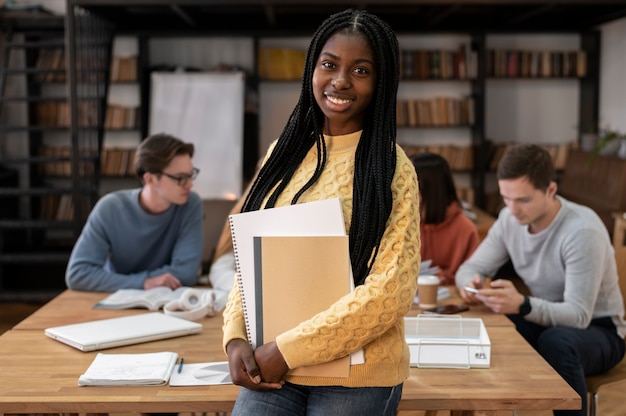

In [ ]:
# view the image
img = Image.open(filename)
img

In [ ]:
print(img.format, img.size, img.mode)

JPEG (626, 416) RGB


In [ ]:
# Split the images into the channels
r, g, b = img.split()

In [ ]:
print(r.format, r.size, r.mode)

None (626, 416) L


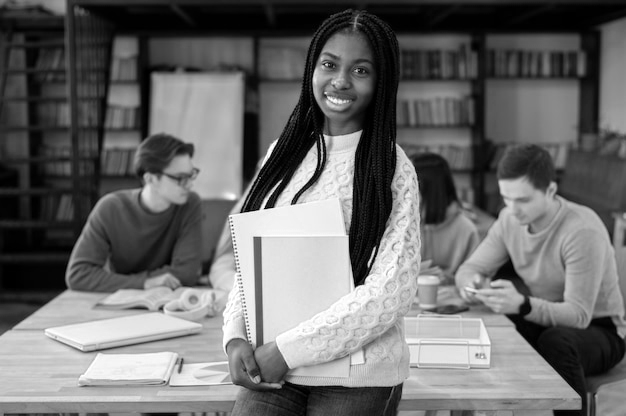

In [ ]:
r

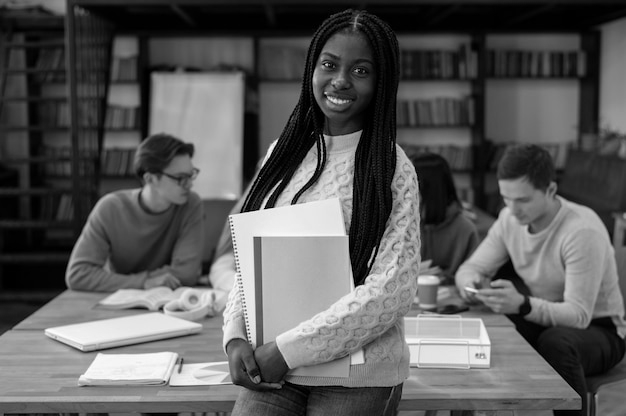

In [ ]:
g

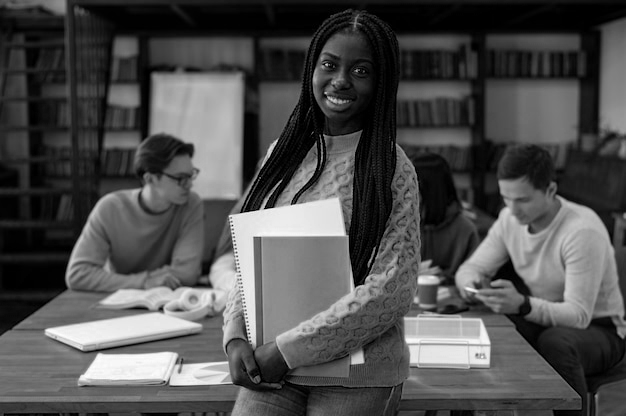

In [ ]:
b

In [ ]:
# convert the images to numpy to view the dimensions
img_array = np.array(img)

img_array.size, img_array.ndim, img_array.shape

(781248, 3, (416, 626, 3))

(-0.5, 625.5, 415.5, -0.5)

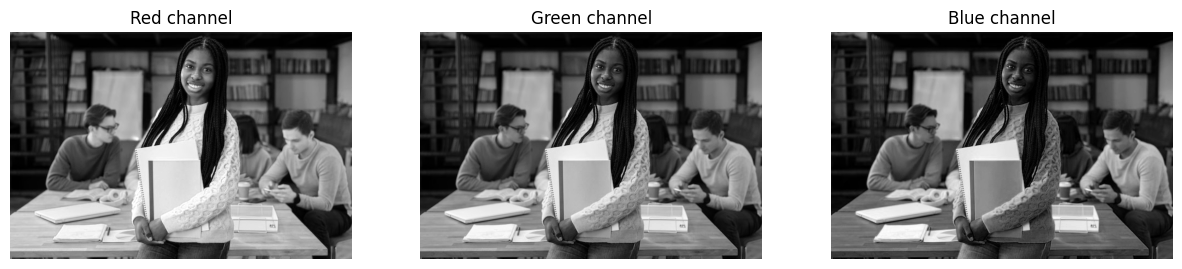

In [ ]:
# extract the RED channel in the image

img_red = img_array[:, :, 0]
img_red = Image.fromarray(img_red)

# extract the GREEN channel in the image
img_green = img_array[:, :, 1]

img_green = Image.fromarray(img_green)


# extract the RED channel in the image
img_blue = img_array[:, :, 2]
img_blue = Image.fromarray(img_blue)


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(15, 4))

ax1.imshow(img_red, cmap='gray')
ax1.set_title("Red channel")
ax1.axis('off')

ax2.imshow(img_green, cmap='gray')
ax2.set_title("Green channel")
ax2.axis('off')

ax3.imshow(img_blue, cmap='gray')
ax3.set_title("Blue channel")
ax3.axis('off')



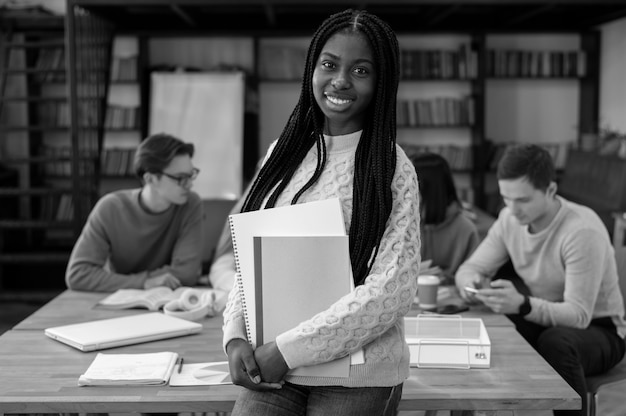

In [ ]:
# convert the image to gray
img_gray = img.convert("L")
img_gray

In [ ]:
img_gray.save("students_gray.png", 'png')

In [ ]:
# Reading Dicom File and display it
ds = pydicom.dcmread("/kaggle/input/dicom-single/1-036.dcm")

fig = plt.figure(dpi = 150)

plt.imshow(ds.pixel_array, cmap=plt.cm.gray)
plt.axis('off')

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/dicom-single/1-036.dcm'

In [ ]:
# Write the content of the dicome file
print(ds)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 196
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.1188.4001.270918844824382877945674902604
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'M_FFE', 'M', 'FFE']
(0008,0012) Instance Creation Date              DA: '20010302'
(0008,0013) Instance Creation Time              TM: '041530'
(0008,0014) Instance Creator UID                UI: 1.3.6.1.4.1.14519.5.2.1.1188.4001.25384

In [ ]:
# view the pixel data
ds.PixelData[:50]

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00'

In [ ]:
# check if the image has done any transfer

tsyntax = ds.file_meta.TransferSyntaxUID

tsyntax.name

'Explicit VR Little Endian'

In [ ]:
tsyntax.is_compressed

False

In [ ]:
# Access the encapsulated frame
ds.group_dataset(0x0028)

(0028,0002) Samples per Pixel                   US: 1
(0028,0004) Photometric Interpretation          CS: 'MONOCHROME2'
(0028,0010) Rows                                US: 512
(0028,0011) Columns                             US: 512
(0028,0030) Pixel Spacing                       DS: [0.44921875, 0.44921875]
(0028,0100) Bits Allocated                      US: 16
(0028,0101) Bits Stored                         US: 12
(0028,0102) High Bit                            US: 11
(0028,0103) Pixel Representation                US: 0
(0028,0301) Burned In Annotation                CS: 'NO'
(0028,0303) Longitudinal Temporal Information M SH: 'MODIFIED'
(0028,1050) Window Center                       DS: '775'
(0028,1051) Window Width                        DS: '1347'
(0028,1052) Rescale Intercept                   DS: '0'
(0028,1053) Rescale Slope                       DS: '5.92258852258852'
(0028,1054) Rescale Type                        LO: 'normalized'
(0028,2110) Lossy Image Compression        

# Filtering

 ![UcdFilterTudFilterGIF.gif](attachment:21671de9-9cc1-4729-8e08-a01cb4ebc79d.gif)

### Mean Filtering 😒

(-0.5, 511.5, 511.5, -0.5)

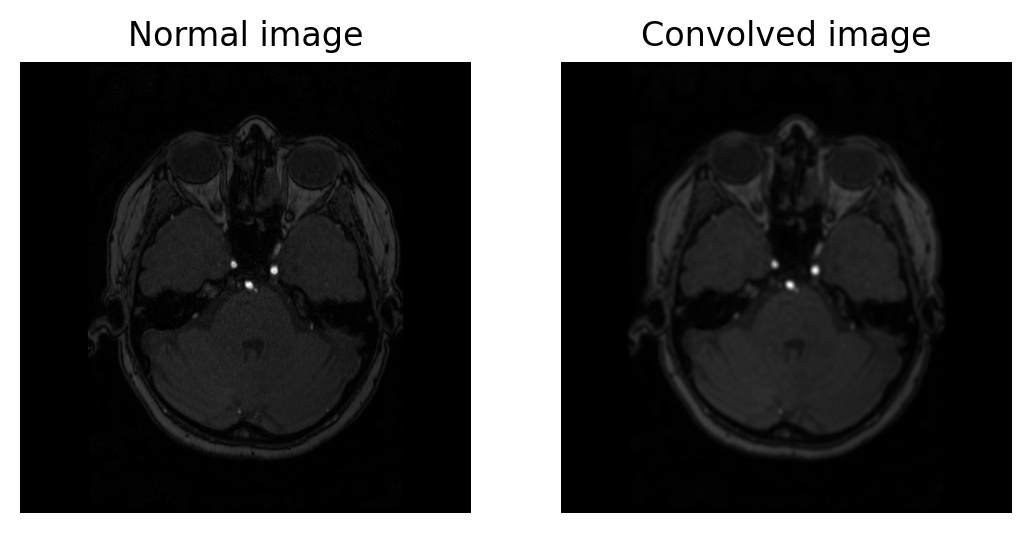

In [ ]:
# convert the image to numpy arrays
ds_array = ds.pixel_array

# Remember, the image is a 1-channel, which is a grayscale.
# Initialize the filter
mean_filter = np.ones((5, 5))/25

# Perform convolution
convolved_array = scipy.ndimage.convolve(ds_array, mean_filter)

# view the convolve image
fig, (ax1, ax2) = plt.subplots(1,2, dpi=200)
ax1.imshow(ds_array, cmap=plt.cm.gray)
ax1.set_title("Normal image")
ax1.axis('off')

ax2.imshow(convolved_array, cmap=plt.cm.gray)
ax2.set_title("Convolved image")
ax2.axis('off')

In [ ]:
# view the actual pixels
ds_array[100: 400, 100: 400]

array([[13, 11,  2, ...,  9,  7,  4],
       [ 6,  5,  2, ...,  7,  6,  5],
       [ 5,  2,  4, ...,  5,  6,  7],
       ...,
       [ 0,  1,  1, ...,  3,  2,  2],
       [ 1,  2,  2, ...,  1,  1,  1],
       [ 1,  2,  2, ...,  1,  0,  1]], dtype=uint16)

In [ ]:
# view the convolved array
convolved_array[100: 400, 100: 400]

array([[7, 5, 5, ..., 5, 5, 5],
       [7, 6, 6, ..., 5, 5, 5],
       [6, 6, 6, ..., 4, 4, 5],
       ...,
       [1, 2, 2, ..., 1, 2, 2],
       [1, 1, 2, ..., 1, 2, 2],
       [0, 1, 1, ..., 1, 2, 2]], dtype=uint16)

## Median Filtering 😒

In [ ]:
# Let add noise to the the image above.
def add_salt_and_pepper_noise(image, salt_prob=0.02, pepper_prob=0.02):
    """
    Adds salt and pepper noise to an image using NumPy and PIL.

    :param image: PIL Image (grayscale or RGB)
    :param salt_prob: Probability of salt noise (white pixels)
    :param pepper_prob: Probability of pepper noise (black pixels)
    :return: PIL Image with noise
    """

    original_img = image.pixel_array  # Convert image to NumPy array
    img_arr = np.copy(original_img)
    total_pixels = img_arr.size  # Total number of pixels

    # Salt (white pixels)
    num_salt = int(total_pixels * salt_prob)
    coords = [np.random.randint(0, i - 1, num_salt) for i in img_arr.shape[:2]]
    img_arr[coords[0], coords[1]] = 255  # Set salt pixels to white

    # Pepper (black pixels)
    num_pepper = int(total_pixels * pepper_prob)
    coords = [np.random.randint(0, i - 1, num_pepper) for i in img_arr.shape[:2]]
    img_arr[coords[0], coords[1]] = 0  # Set pepper pixels to black

    return original_img, img_arr

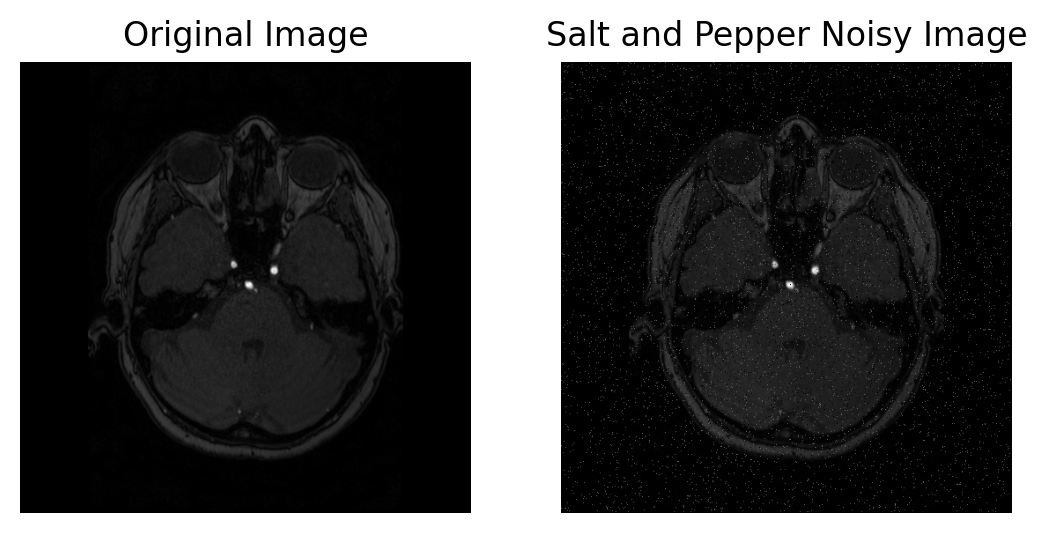

In [ ]:
# Apply salt and pepper noise
original_img, noisy_image = add_salt_and_pepper_noise(ds, salt_prob=0.02, pepper_prob=0.02)

# Display original and noisy images
plt.figure(dpi=200)

plt.subplot(1, 2, 1)
plt.imshow(original_img, cmap=plt.cm.gray)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap=plt.cm.gray)
plt.title("Salt and Pepper Noisy Image")
plt.axis("off")

plt.show()

(-0.5, 511.5, 511.5, -0.5)

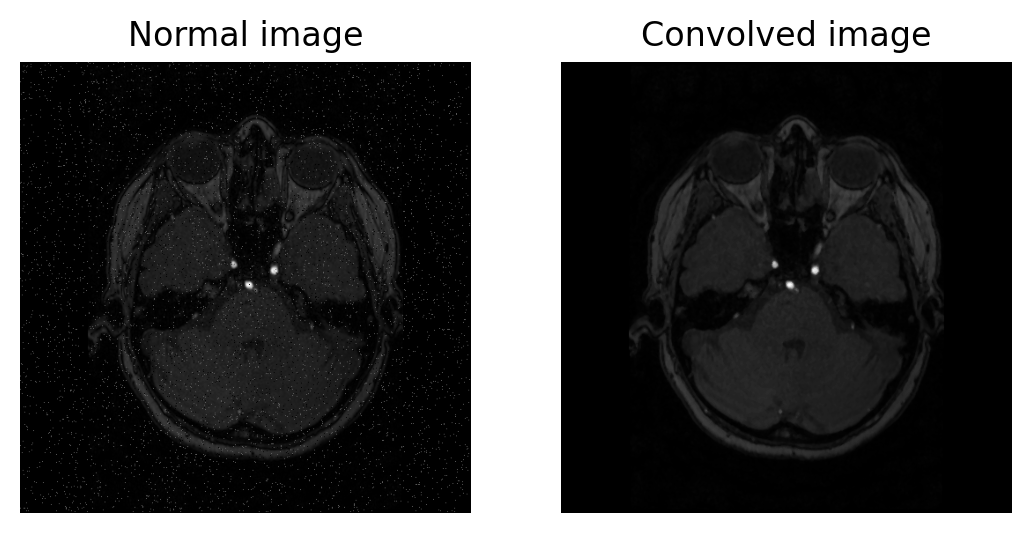

In [ ]:

# Perform median filter on the salt-and-pepper image
median_filter_array = scipy.ndimage.median_filter(noisy_image, size=3)   # a can be changed to see the effect of the kernel

# view the convolve image
fig, (ax1, ax2) = plt.subplots(1,2, dpi=200)
ax1.imshow(noisy_image, cmap=plt.cm.gray)
ax1.set_title("Normal image")
ax1.axis('off')

ax2.imshow(median_filter_array, cmap=plt.cm.gray)
ax2.set_title("Convolved image")
ax2.axis('off')

## Max and Min Filter

(-0.5, 511.5, 511.5, -0.5)

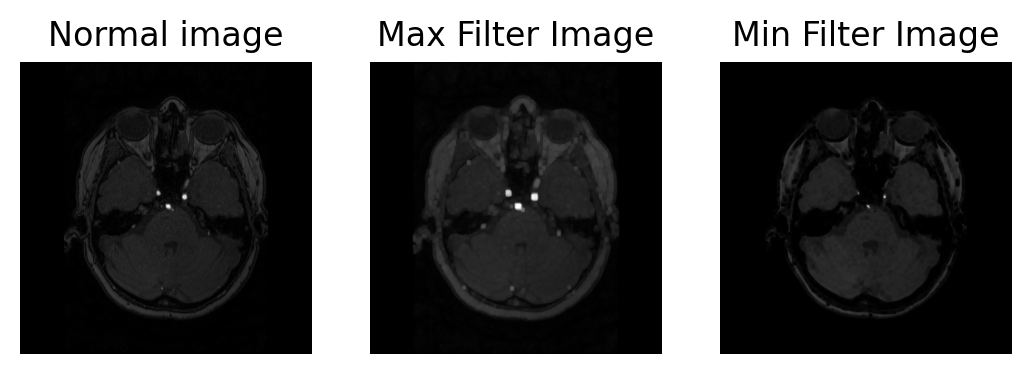

In [ ]:

size = 5
max_array = scipy.ndimage.maximum_filter(ds_array, size=size)
min_array = scipy.ndimage.minimum_filter(ds_array, size=size)

# view the convolve image
fig, (ax1, ax2, ax3) = plt.subplots(1,3, dpi=200)
ax1.imshow(ds_array, cmap=plt.cm.gray)
ax1.set_title("Normal image")
ax1.axis('off')

ax2.imshow(max_array, cmap=plt.cm.gray)
ax2.set_title("Max Filter Image")
ax2.axis('off')

ax3.imshow(min_array, cmap=plt.cm.gray)
ax3.set_title("Min Filter Image")
ax3.axis('off')

## Sobel Filter 😒

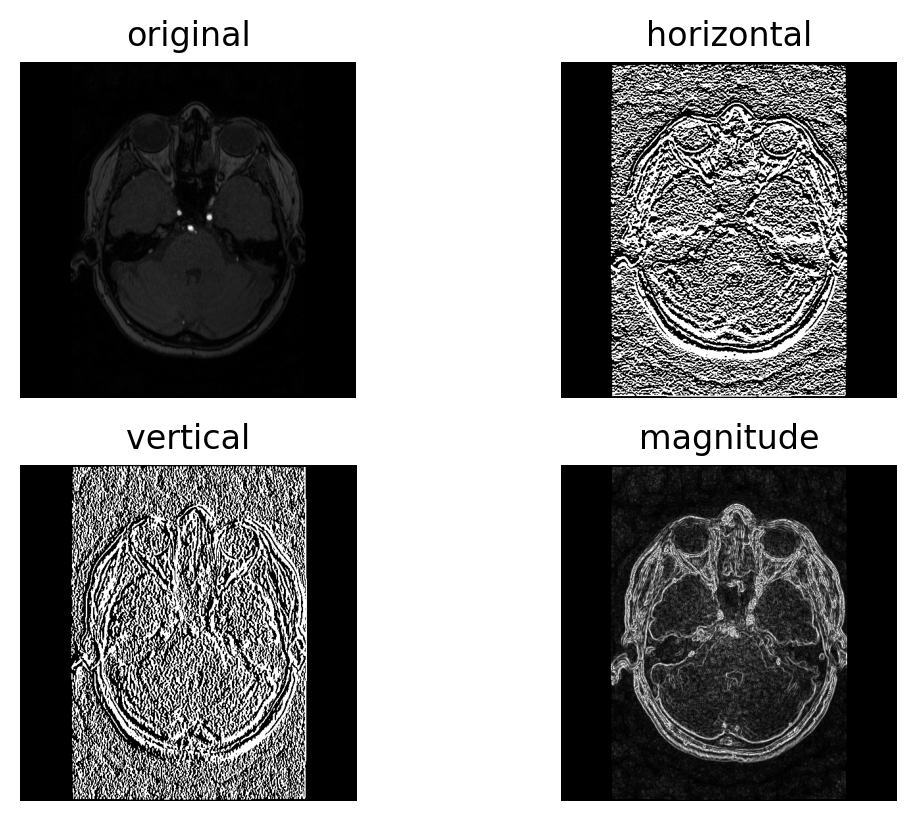

In [ ]:

sobel_arr_h = scipy.ndimage.sobel(ds_array, 0)             # horizontal gradient
sobel_arr_v = scipy.ndimage.sobel(ds_array, 1)    # vertical gradient
magnitude = np.sqrt(sobel_arr_h**2 + sobel_arr_v**2)
magnitude *= 255.0 / np.max(magnitude)

# view the convolve image
fig, axs = plt.subplots(2,2, dpi=200)
plt.gray()
axs[0,0].imshow(ds_array)
axs[0,1].imshow(sobel_arr_h)
axs[1,0].imshow(sobel_arr_v)
axs[1,1].imshow(magnitude)
titles = ['original', 'horizontal', 'vertical', 'magnitude']

for i, ax in enumerate(axs.ravel()):
    ax.set_title(titles[i])
    ax.axis('off')
plt.show()

## Prewitt Filter 😒

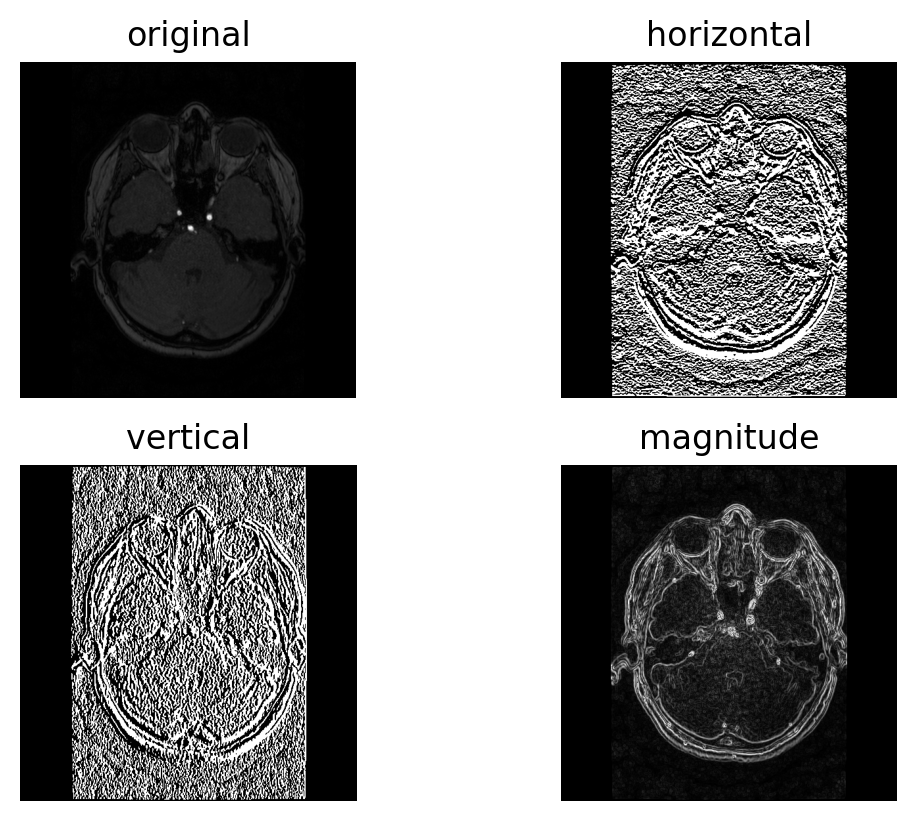

In [ ]:

prewitt_arr_h = scipy.ndimage.prewitt(ds_array, 0)             # horizontal gradient
prewitt_arr_v = scipy.ndimage.prewitt(ds_array, 1)    # vertical gradient
magnitude = np.sqrt(prewitt_arr_h**2 + prewitt_arr_v**2)
magnitude *= 255.0 / np.max(magnitude)

# view the convolve image
fig, axs = plt.subplots(2,2, dpi=200)
plt.gray()
axs[0,0].imshow(ds_array)
axs[0,1].imshow(prewitt_arr_h)
axs[1,0].imshow(prewitt_arr_v)
axs[1,1].imshow(magnitude)
titles = ['original', 'horizontal', 'vertical', 'magnitude']

for i, ax in enumerate(axs.ravel()):
    ax.set_title(titles[i])
    ax.axis('off')
plt.show()

(-0.5, 511.5, 511.5, -0.5)

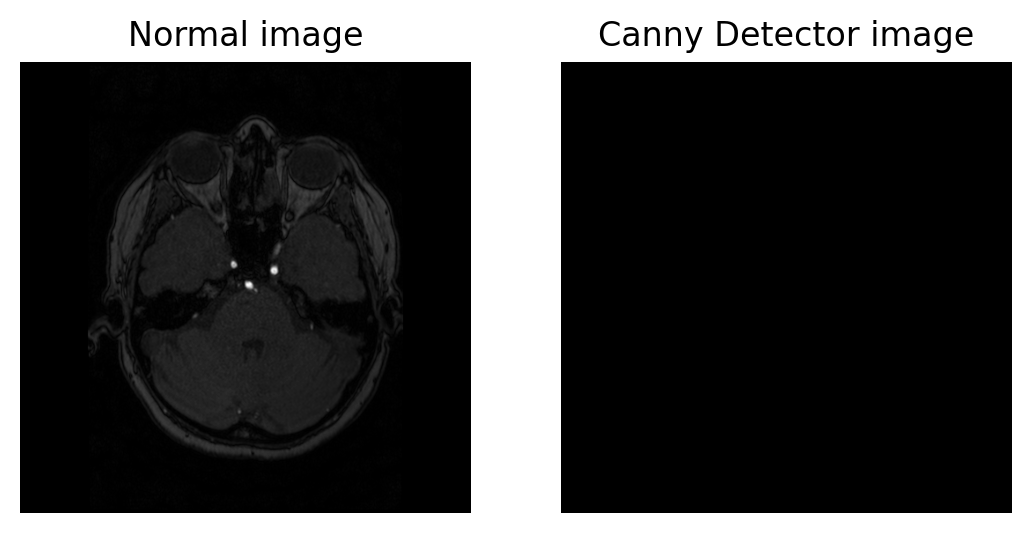

In [ ]:
edges_array = feature.canny(ds_array, sigma=1)    # sigma is the standard deviation

# view the convolve image
fig, (ax1, ax2) = plt.subplots(1,2, dpi=200)
ax1.imshow(ds_array, cmap=plt.cm.gray)
ax1.set_title("Normal image")
ax1.axis('off')

ax2.imshow(edges_array, cmap=plt.cm.gray)
ax2.set_title("Canny Detector image")
ax2.axis('off')

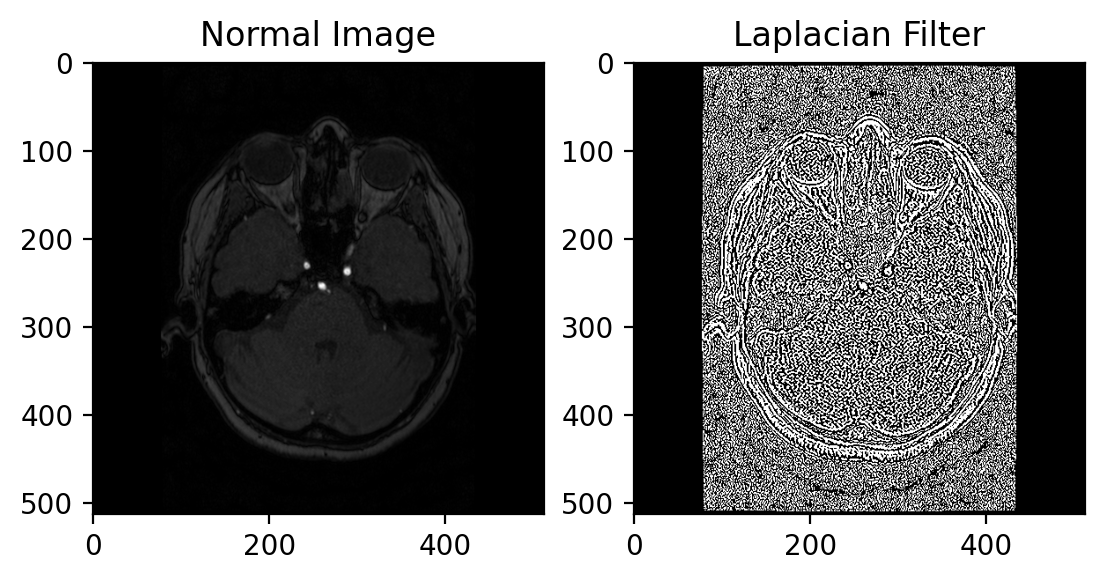

In [ ]:
fig = plt.figure(dpi=200)
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(121)  # left side
ax2 = fig.add_subplot(122)  # right side

laplace_array = scipy.ndimage.laplace(ds_array)
ax1.imshow(ds_array)
ax1.set_title("Normal Image")

ax2.imshow(laplace_array)
ax2.set_title("Laplacian Filter")
plt.show()

## Using Imageio Library

In [ ]:
# Read the image as volume
brain_vol = iio.imread(data_dir, plugin="DICOM")

Reading DICOM (examining files): 1/138 files (0.757/138 files (41.3110/138 files (79.7%138/138 files (100.0%)
  Found 2 correct series.
Reading DICOM (loading data): 29/29  (100.0%)


In [ ]:
# We have 29 slices
brain_vol.shape

(29, 512, 512)

In [ ]:
# Pick a random image
random_idx = np.random.choice(np.arange(brain_vol.shape[0]))


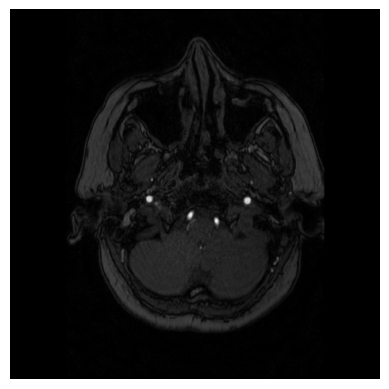

In [ ]:
# show the any of the slices
plt.imshow(brain_vol[random_idx], cmap='gray')
plt.axis('off')
plt.show()

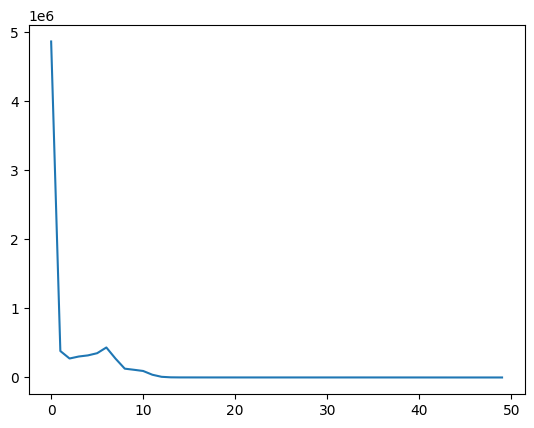

In [ ]:
plt.plot(scipy.ndimage.histogram(brain_vol, min=0, max=np.max(brain_vol), bins=50))
plt.show()

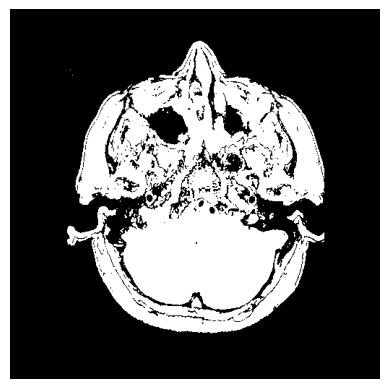

In [ ]:
# Creating a binary mask
gm_min = ((np.max(brain_vol))/50)*2
gm_max = ((np.max(brain_vol))/50)*15

brain_mask1 = np.where(brain_vol > gm_min, 1, 0)
brain_mask2 = np.where(brain_vol < gm_max, 1, 0)

brain_mask = brain_mask1 + brain_mask2
brain_mask = np.where(brain_mask == 2, 1, 0)

plt.imshow(brain_mask[brain_mask.shape[0]//2, :, :], cmap='gray')
plt.axis('off')
plt.show()



In [ ]:
brain_mask.shape

(29, 512, 512)

In [ ]:
# brain_slice = iio.imread(np.random.choice[data_list], "DICOM")
# type(brain_slice)

brain_slice = iio.imread(np.random.choice(data_list))
type(brain_slice)

Reading DICOM (examining files): 1/138 files (0.760/138 files (43.5135/138 files (97.8%138/138 files (100.0%)
  Found 2 correct series.
Reading DICOM (loading data): 29/29  (100.0%)


numpy.ndarray

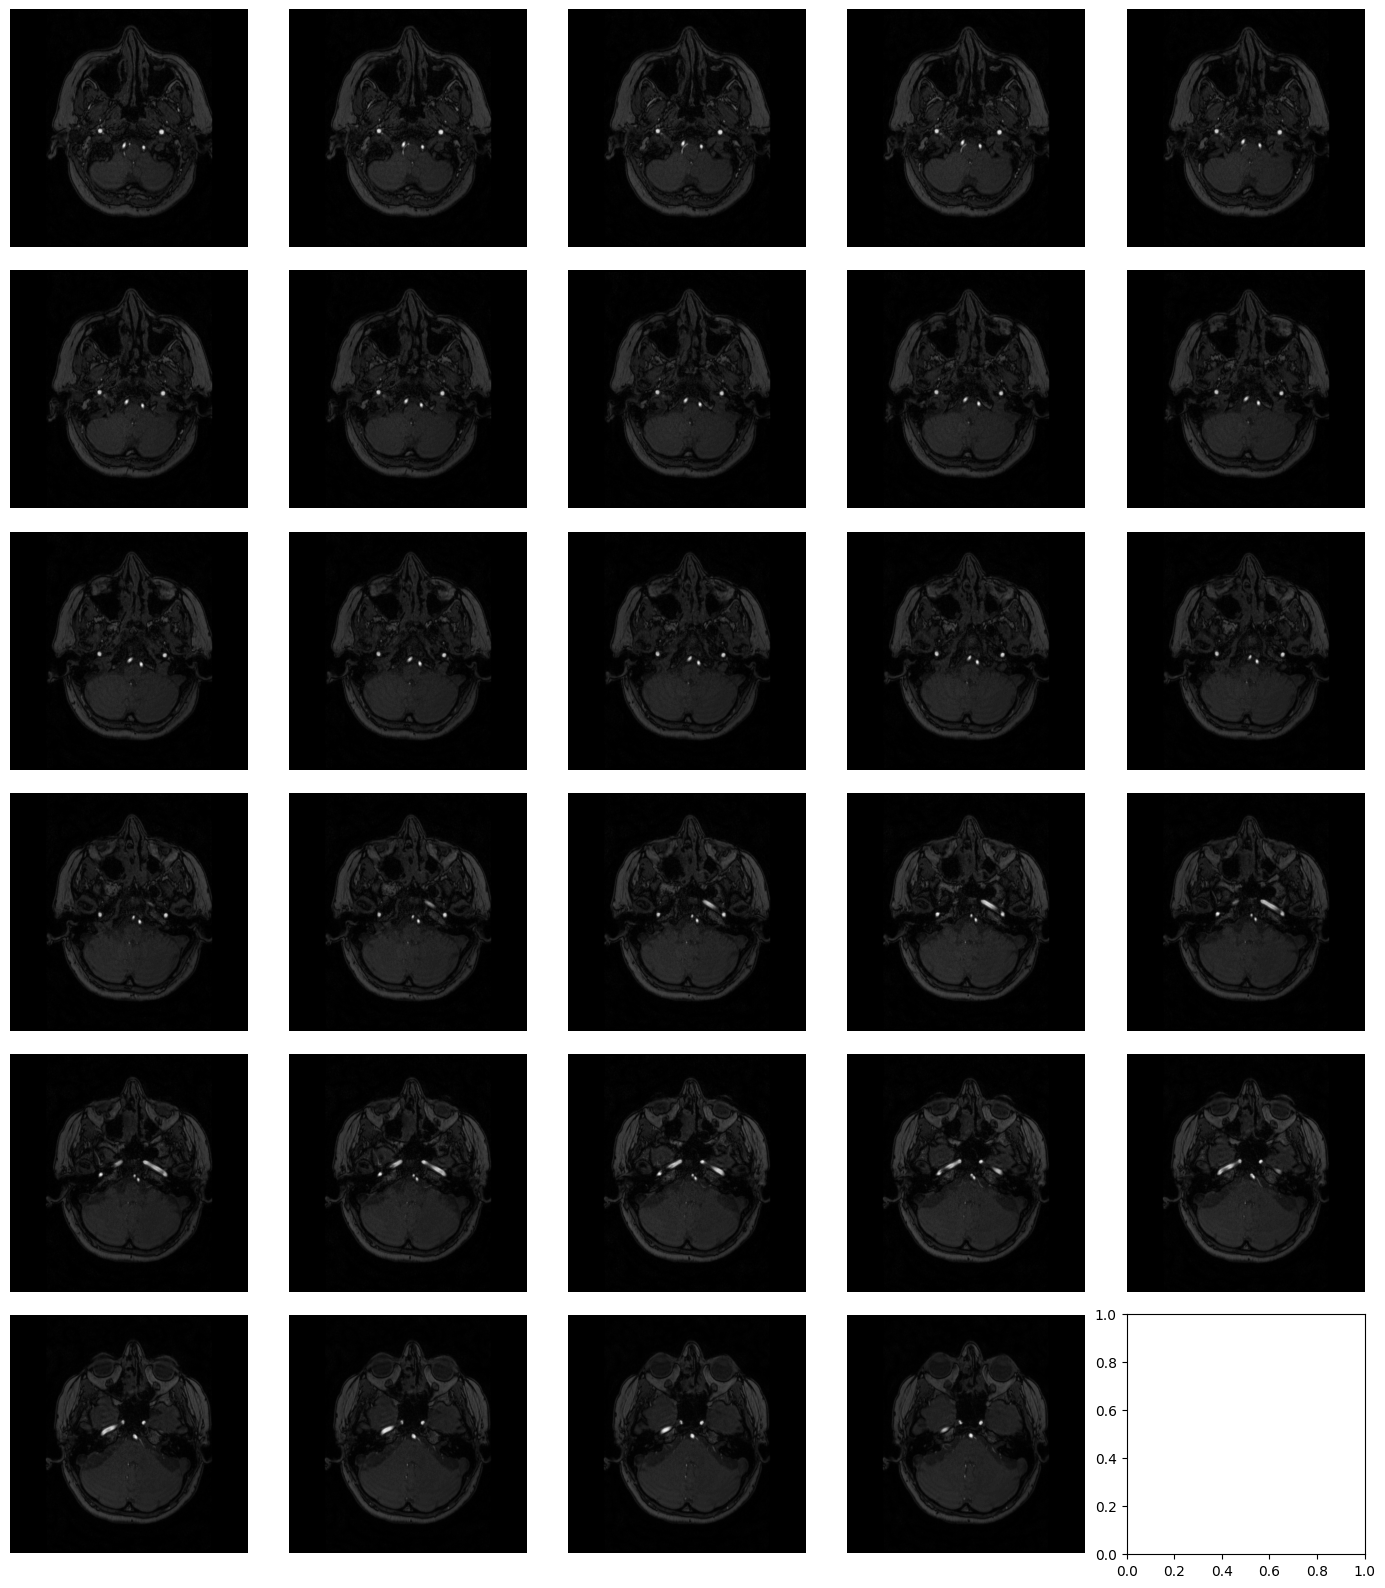

In [ ]:
# Plot through the series
n_rows, n_cols = 6, 5

fig, axs = plt.subplots(6, 5, figsize=(14,16))

for idx in range(brain_vol.shape[0]):
    axs.flat[idx].imshow(brain_vol[idx, :, :], cmap='gray')
    axs.flat[idx].axis('off')

plt.tight_layout()
plt.show()

## Loading NIFTI Image

In [ ]:
data_dir = "/kaggle/input/brats2023-ssa"
training_dir = "ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData"
training_sub_dir = "ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2"

data_full_path = os.path.join(data_dir, training_dir, training_sub_dir)
print(data_full_path)


data_list = []
data_dict = {}
#file_list = []

for dirname in os.listdir(data_full_path):
    dir_path = os.path.join(data_full_path, dirname)

    if os.path.isdir(dir_path):
        data_list.append(dirname)


# Map each case to its actual files
for dirname in data_list:
    dir_path = os.path.join(data_full_path, dirname)

    # Collect file paths in a list
    file_paths = [os.path.join(dir_path, file) for file in os.listdir(dir_path)]

    # Store in dictionary
    data_dict[dirname] = file_paths

#data_dict

/kaggle/input/brats2023-ssa/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData/ASNR-MICCAI-BraTS2023-SSA-Challenge-TrainingData_V2


In [ ]:
# for key, files in data_dict.items():
#     print(f"\Case: {key}")
#     for file in files:
#         print(f" - {files}")

In [ ]:
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# view on case
case_keys = list(data_dict.keys())

# randomly select a case
case_idx = np.random.choice(np.arange(len(case_keys)))

# Get teh list of files for the selected case
case_files = data_dict[case_keys[case_idx]]

# Extract the individual files
seg, t1c, t1n, t2f, t2w = [nib.load(case_files[i]) for i in range(5)]

In [ ]:
#case_keys

In [ ]:
type(seg), type(t1c)

(nibabel.nifti1.Nifti1Image, nibabel.nifti1.Nifti1Image)

In [ ]:
# view the brain header
print(seg)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (240, 240, 155)
affine:
[[  1.   0.  -0.  -0.]
 [  0.   1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b 

In [ ]:
print(t1c)


<class 'nibabel.nifti1.Nifti1Image'>
data shape (240, 240, 155)
affine:
[[  1.   0.  -0.  -0.]
 [  0.   1.  -0. 239.]
 [  0.   0.   1.   0.]
 [  0.   0.   0.   1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [  3 240 240 155   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : float32
bitpix          : 32
slice_start     : 0
pixdim          : [1. 1. 1. 1. 0. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 2
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b 

In [ ]:
# Convert the individual slices to numpy array
seg_data, t1c_data, t1n_data, t2f_data, t2w_data = seg.get_fdata(), t1c.get_fdata(), t1n.get_fdata(), t2f.get_fdata(), t2w.get_fdata()

In [ ]:
type(seg_data), type(t1c_data)

(numpy.memmap, numpy.memmap)

In [ ]:
seg_data.shape, t1c_data.shape

((240, 240, 155), (240, 240, 155))

(-0.5, 154.5, 239.5, -0.5)

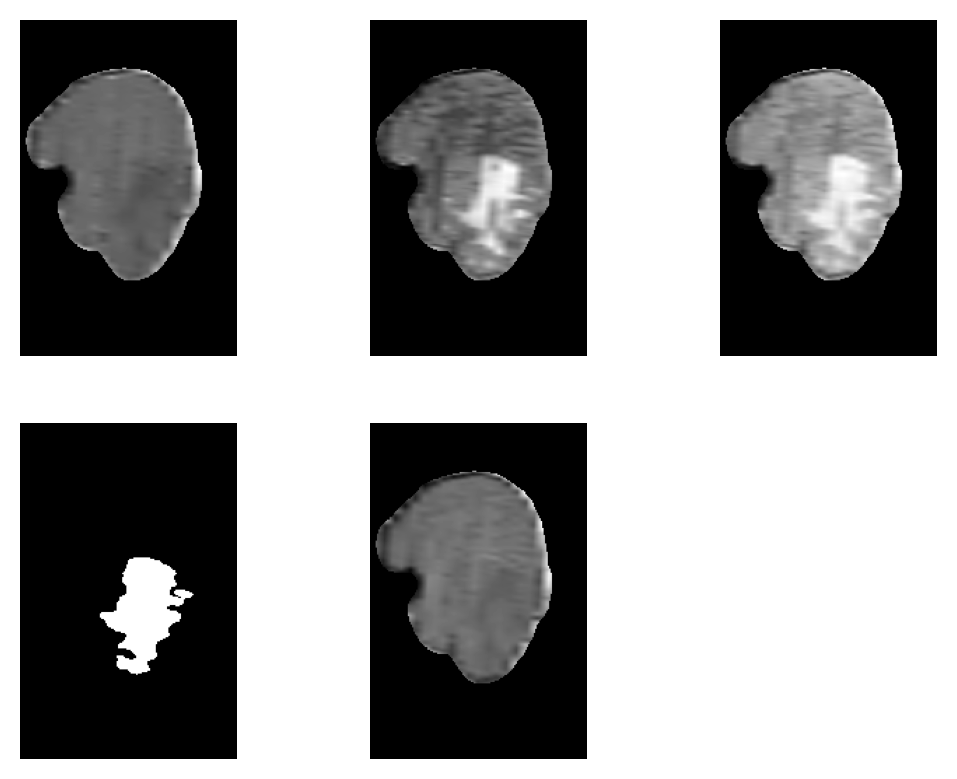

In [ ]:
# Visualize a slice
#

rand_slice = np.random.choice([i for i in range(seg_data.shape[2])])

fig = plt.figure(dpi=200)
plt.gray()  # show the filtered result in grayscale
ax1 = fig.add_subplot(231)  # left side
ax2 = fig.add_subplot(232)  # right side
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)

ax1.imshow(seg_data[rand_slice])
ax1.axis('off')

ax2.imshow(t1c_data[rand_slice])
ax2.axis('off')

ax3.imshow(t1n_data[rand_slice])
ax3.axis('off')

ax4.imshow(t2f_data[rand_slice])
ax4.axis('off')

ax5.imshow(t2w_data[rand_slice])
ax5.axis('off')


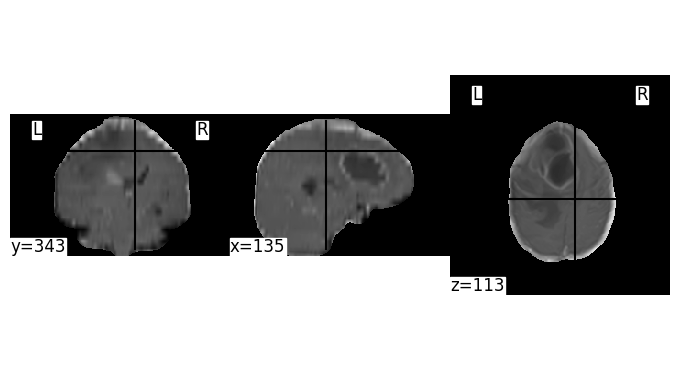

In [ ]:
plotting.plot_img(seg)
plotting.show()

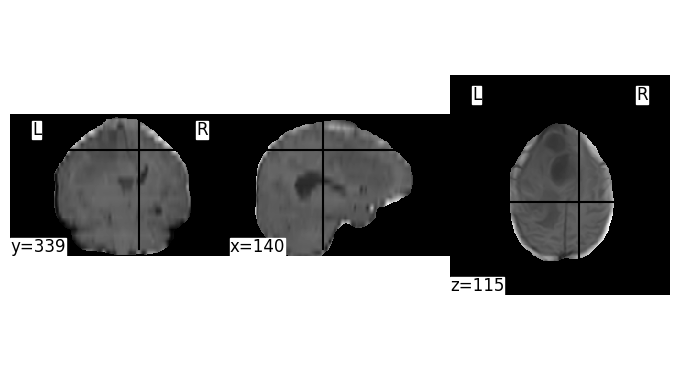

In [ ]:
plotting.plot_img(t2w)
plotting.show()

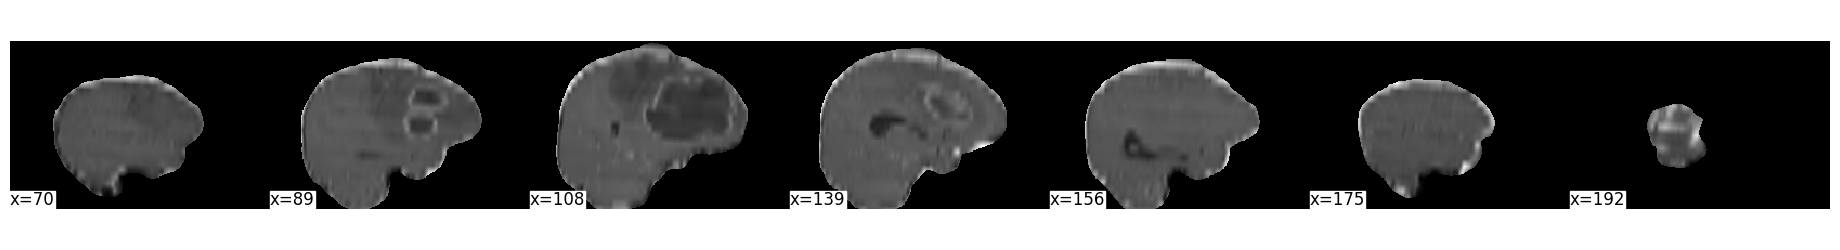

In [ ]:
plotting.plot_img(seg, display_mode='x', cmap='gray')
plt.show()

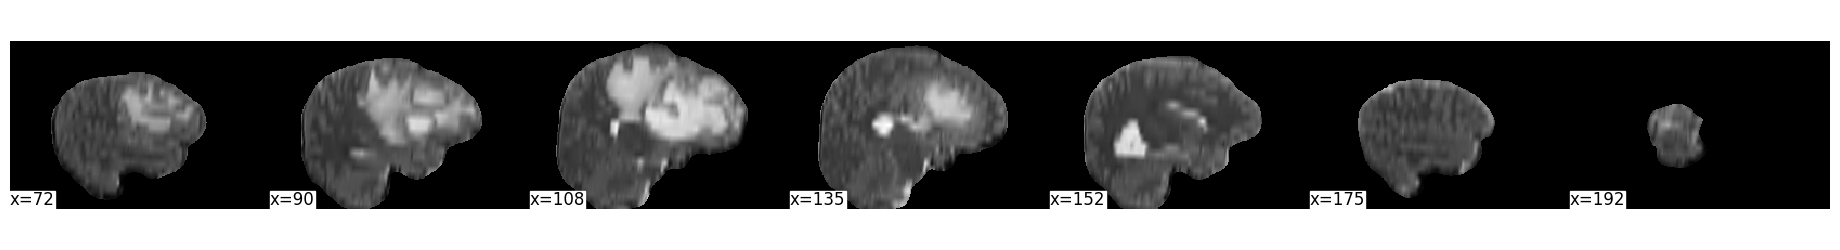

In [ ]:
plotting.plot_img(t1c, display_mode='x', cmap='gray')
plt.show()

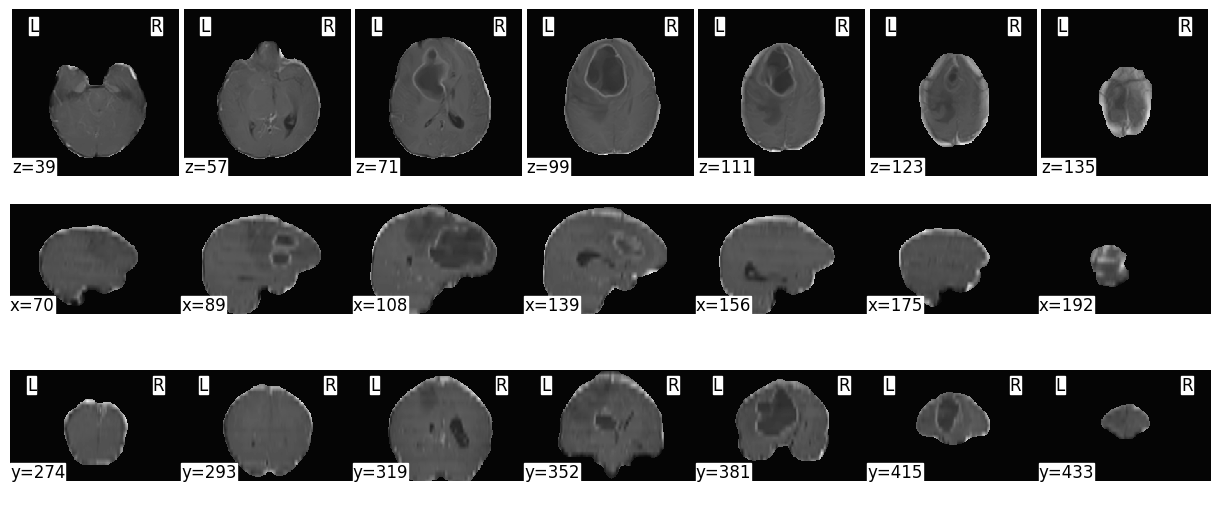

In [ ]:
plotting.plot_img(seg, display_mode='mosaic', cmap='gray')
plt.show()

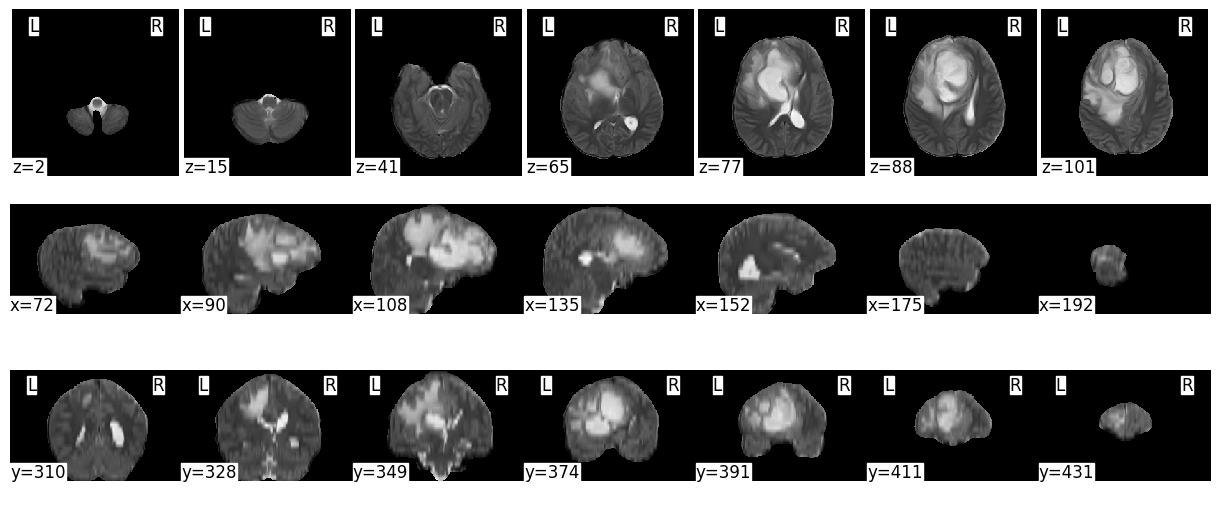

In [ ]:
plotting.plot_img(t1c, display_mode='mosaic', cmap='gray')
plt.show()